In [1]:
%run '/mnt/berger2/equipes/IGE/meom/workdir/berger2/fonctions/meom_fonctions/fonctions.ipynb'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as netcdf
import qgutils as qg
from matplotlib import ticker, cm
plt.ion()

In [2]:
#paramètres gravés dans le marbre pour le stage

Delta = 10000                               #grid spacing
f0 = 9.37456E-05                           #paramètre de Coriolis
dh = np.array([350,750,2900])              #hauteurs des couches océaniques
dh_b = np.array([(dh[0]+dh[1])/2,(dh[0]+dh[1])/2])
g_prime = np.array([2.5E-02,1.25E-02])     #gravités réduites aux interfaces
Beta = 1.75360E-11
delta_ek = 5                               #ocean bottom Ekman thickness 
nu4 = 2E09                                 #bi-harmonic viscosity
Ht = np.sum(dh)
Ht_b = np.sum(dh_b)
toc = np.array([1.31693E+01,1.81693E+01,2.41693E+01])
bf = delta_ek*f0/(2*dh[-1])

#fréquences Brunt-vaisala

N_12 = g_prime[0]/((dh[0]+dh[1])/2)
N_23 = g_prime[1]/((dh[1]+dh[2])/2)
N2 = np.array([N_12,N_23])

In [3]:
dir0  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2//qgcm-data/double_gyre_coupled/outdata_9tdiff/'
file0 = 'ocpo.nc'

In [4]:
#get xp, yp : basin size
f1 = netcdf.netcdf_file(dir0 + file0,'r')

xp = f1.variables['xp'][:-1].copy()
yp = f1.variables['xp'][:-1].copy()

In [5]:
#load

# flot moyen
flot_me = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/termes_flot_moyen_rel.npz')

e_surf = integral_z( flot_me['e_surf'], dh=dh, Delta=Delta, Ht = dh[0])
e_diab = integral_z(flot_me['e_diab'], dh=dh, Delta=Delta, Ht = dh_b[0] )
dissip_ke_me = integral_z(flot_me['e_dissip_k'], dh=dh, Delta=Delta, Ht = Ht)
w_b_me = integral_z(flot_me['w_b_me'], dh=dh, Delta=Delta, Ht = Ht_b)
e_bottom_me = integral_z(flot_me['e_bottom'], dh=dh, Delta=Delta, Ht = dh[2])
ke_me_i = integral_z(flot_me['ke_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_me_i = integral_z(flot_me['pe_me'], dh=dh, Delta=Delta, Ht = Ht_b)
u_me = flot_me['u_me']
v_me = flot_me['v_me']
taux_me = flot_me['taux_me']
tauy_me = flot_me['tauy_me']

#attention à l'intégration !!

flot_me_et = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/etapes_flot_moyen_rel.npz')

surf_me= flot_me_et['surf_me']
diab_me= flot_me_et['diab_me']
dissip_me= flot_me_et['dissip_me']
bottom_ekman_me= flot_me_et['bottom_ekman_me']
w_me = flot_me_et['w_me']

b_me= flot_me_et['b_me']
p_me= flot_me_et['p_me']

#load perturbations

flot_pert = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/termes_perturbation_rel.npz')

e_surf_p_me = flot_pert['e_surf_p_me']
e_diab_p_me = integral_z(flot_pert['e_diab_p_me'], dh=dh, Delta=Delta, Ht = dh_b[0])
w_b_p_me = integral_z(flot_pert['w_b_p_me'], dh=dh, Delta=Delta, Ht = Ht_b)
ke_me2ke_p_me = integral_z(flot_pert['ke_me2ke_p_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_me2pe_p_me = integral_z(flot_pert['pe_me2pe_p_me'], dh=dh, Delta=Delta, Ht = Ht)
ke_p_me = integral_z(flot_pert['ke_p_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_p_me = integral_z(flot_pert['pe_p_me'], dh=dh, Delta=Delta, Ht = Ht_b)

flot_pert_diss = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/dissip_perturbation_rel.npz')
dissip_k_p_me = integral_z(flot_pert_diss['dissip_k_p_me'], dh=dh, Delta=Delta, Ht = Ht)
e_bottom_p_me = flot_pert_diss['e_bottom_p_me']

#flux perturbations


flot_pert_et = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/etapes_perturbation_rel.npz')

k_surf_p_me = flot_pert_et['k_vt_p_me']
fl_surf_p_me = flot_pert_et['fl_vt_p_me']

k_diab_p_me = flot_pert_et['k_diab_p_me']
fl_diab_p_me = flot_pert_et['fl_diab_p_me']

k_dissip_p_me = flot_pert_et['k_dissip_p_me']
fl_dissip_p_me = flot_pert_et['fl_dissip_p_me']

k_bottom_p_me = flot_pert_et['k_bottom_p_me']
fl_bottom_p_me = flot_pert_et['fl_bottom_p_me']

k_w_p_me = flot_pert_et['k_w_p_me']
fl_w_p_me = flot_pert_et['fl_w_p_me']

jac_ke = flot_pert_et['jac_ke']
jac_pe = flot_pert_et['jac_pe']





In [6]:
def forward(x):
    return 1/x

def inverse(x):
    return 1/x


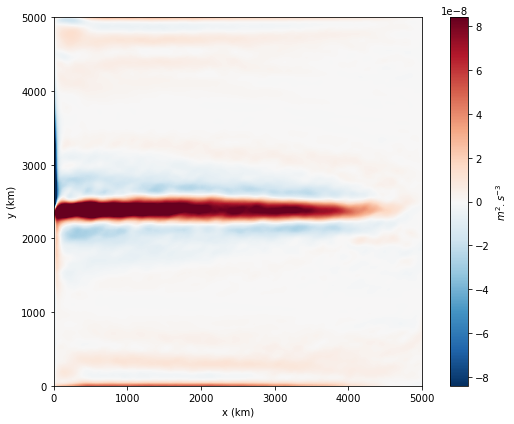

In [7]:
#forçage de vent flot moyen
p_me_use = -p_me[0,:,:]
k_vt_me,fl_vt_me = qg.get_spec_flux(psi1= p_me_use, psi2 = surf_me, Delta = Delta)

vent_me = u_me[0]*taux_me + v_me[0]*tauy_me


fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)

#maxi = max(np.max(vent_me),np.abs(np.min(vent_me)))
maxi = 1.68e-07


col = ax1.imshow(vent_me, origin = 'lower', extent = [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/2, vmin = -maxi/2)
ax1.set_aspect('equal')
#ax1.set_title(r'Wind forcing term in $\overline{\overline{KE}}_t$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(vent_me)
m.set_clim(-maxi/2, maxi/2)
plt.colorbar(m, ax= ax1 ).set_label(r'$m^2.s^{-3}$')




#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/vent_flot_moyen.png')

In [8]:
print(maxi)

1.68e-07


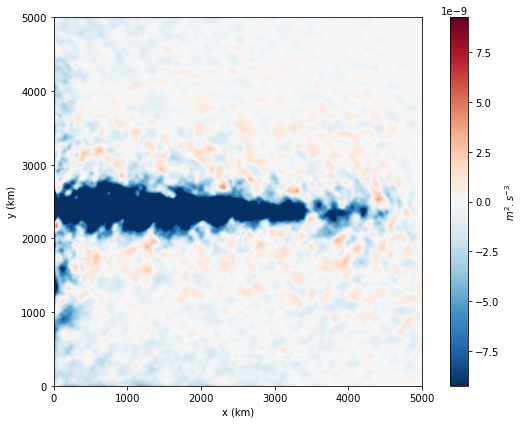

In [9]:
#forçage vent perturbation

#maxi = max(np.max(e_surf_p_me),np.abs(np.min(e_surf_p_me)))
maxi = 2.77e-08

fig, ax1 = plt.subplots(1,1, figsize = (8,6),tight_layout=True)

col = ax1.imshow(e_surf_p_me, origin = 'lower', extent = [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/3, vmin = -maxi/3)
ax1.set_aspect('equal')
#ax1.set_title(r'Wind forcing term in $\overline{KEp}_t$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(e_surf_p_me)
m.set_clim(-maxi/3, maxi/3)
plt.colorbar(m, ax= ax1 ).set_label(r'$m^2.s^{-3}$')



#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/vent_perturbation.png')

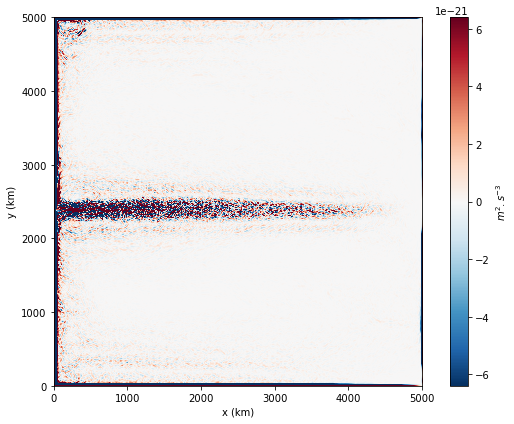

In [10]:
#dissipation flot moyen

dissipation_me = integral_z(u_me*qg.laplacian(qg.laplacian(u_me, Delta), Delta) 
                 + v_me*qg.laplacian(qg.laplacian(v_me, Delta), Delta), dh=dh, Delta=Delta, Ht = Ht)

#maxi = max(np.max(dissipation_me),np.abs(np.min(dissipation_me)))
maxi=3.2e-16

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(dissipation_me,origin = 'lower', extent = [0,5000,0,5000], cmap='RdBu_r', vmax = maxi*2e-5, vmin = -maxi*2e-5)
ax1.set_aspect('equal')
#ax1.set_title(r'Viscous dissipation in $\overline{\overline{KE}}_t$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(dissipation_me)
m.set_clim(-maxi*2e-5, maxi*2e-5)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/dissipation_flot_moyen.png')

In [11]:
print(maxi)

3.2e-16


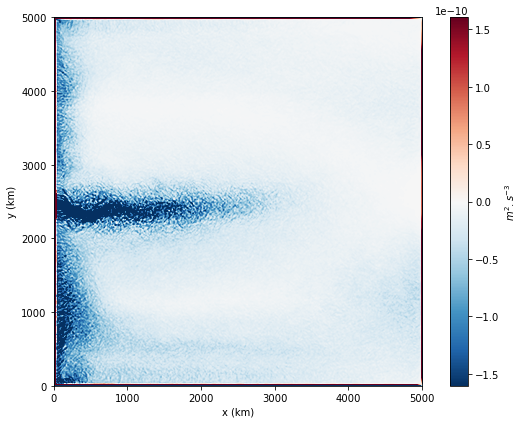

In [12]:
#dissipation perturbation

#maxi = max(np.max(dissip_k_p_me),np.abs(np.min(dissip_k_p_me)))
maxi = 4.0123585225712193e-07

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(dissip_k_p_me, origin = 'lower', extent = [0,5000,0,5000],cmap='RdBu_r', vmax = maxi*4e-04, vmin=-maxi*4e-04)
ax1.set_aspect('equal')
#ax1.set_title(r'Viscous dissipation in $\overline{KEp}_t$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(dissip_k_p_me)
m.set_clim(-maxi*4e-04, maxi*4e-04)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/dissipation_perturbation.png')

In [13]:
print(maxi)

4.0123585225712193e-07


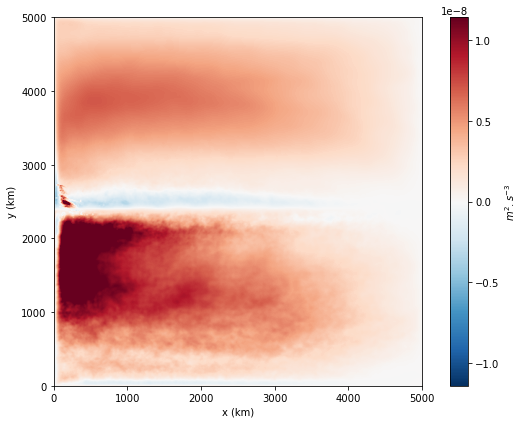

In [44]:
#forçage diabatique flot moyen

#maxi = max(np.max(e_diab),np.abs(np.min(e_diab)))
maxi = 2.2833970633706828e-08


fig, ax1 = plt.subplots(1, 1, figsize = (8, 6), tight_layout=True)


col = ax1.imshow(e_diab, extent = [0,5000,0,5000],origin='lower' , cmap='RdBu_r', vmax = maxi/2, vmin = -maxi/2)
ax1.set_aspect('equal')
#ax1.set_title(r'Forçage diabatique sur $\overline{\overline{PE_t}}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(e_diab)
m.set_clim(-maxi/2, maxi/2)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')


#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/diabatique_flot_moyen.png')

In [41]:
print(maxi)

2.2833970633706828e-08


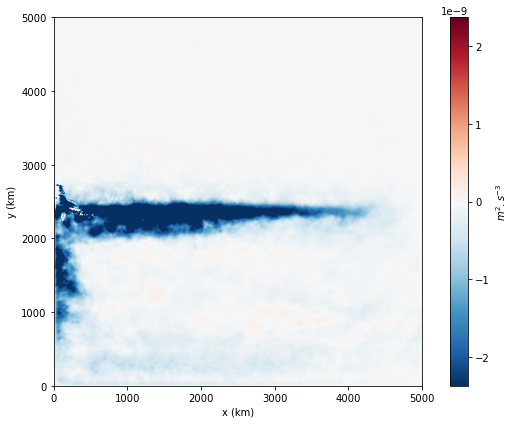

In [48]:
#diabatique perturbation
#k,fl = qg.get_spec_flux(psi1= , psi2 = , Delta = Delta)

#maxi = max(np.max(e_diab_p_me),np.abs(np.min(e_diab_p_me)))
maxi = 1.4187969927697706e-08


fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(e_diab_p_me, origin = 'lower', extent = [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/6, vmin = -maxi/6)
ax1.set_aspect('equal')
#ax1.set_title(r'Forçage diabatique sur $\overline{PEp_t}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(e_diab_p_me)
m.set_clim(-maxi/6, maxi/6)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/diabatique_perturbation.png')

In [46]:
print(maxi)

1.4187969927697706e-08


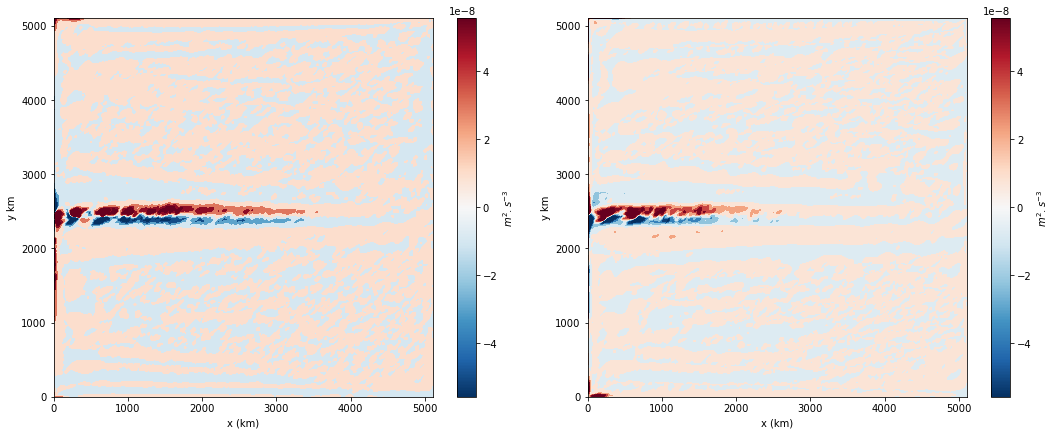

In [17]:
#mean KE to turbulent KE

maxi = max(np.max(ke_me2ke_p_me),np.abs(np.min(ke_me2ke_p_me)))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6),tight_layout=True)


col = ax1.contourf(xp, yp, ke_me2ke_p_me, levels = 100, cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax1.set_aspect('equal')
#ax1.set_title(r'$\overline{\overline{KE}}$ to $\overline{KEp}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y km')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(ke_me2ke_p_me)
m.set_clim(-maxi/20,maxi/20)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')

rec_test = -(u_me+v_me)*(div_x(ke_p_me, Delta) + div_y(ke_p_me, Delta))

re_test = integral_z(rec_test, dh, Delta, Ht)

#maxi = max(np.max(re_test),np.abs(np.min(re_test)))


col = ax2.contourf(xp, yp, re_test, levels = 400, cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax2.set_aspect('equal')
#ax2.set_title(r'$\overline{\overline{KE}}$ to $\overline{KEp}$')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y km')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(re_test)
m.set_clim(-maxi/20,maxi/20)
plt.colorbar(m, ax= ax2).set_label(r'$m^2.s^{-3}$')



#savefig
#plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/ke_me2ke_p_me.png')

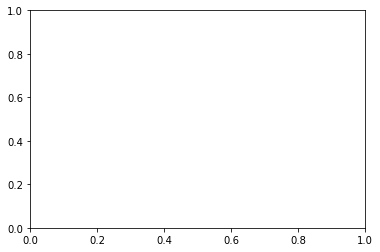

In [18]:
rec_test = -(u_me+v_me)*(div_x(ke_p_me, Delta) + div_y(ke_p_me, Delta))

re_test = integral_z(rec_test, dh, Delta, Ht)

maxi = max(np.max(re_test),np.abs(np.min(re_test)))


col = ax2.contourf(xp, yp, re_test, levels = 300, cmap='RdBu_r', vmax = maxi/100, vmin = -maxi/100)
ax2.set_aspect('equal')
#ax2.set_title(r'$\overline{\overline{KE}}$ to $\overline{KEp}$')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y km')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(re_test)
m.set_clim(-maxi/100,maxi/100)
plt.colorbar(m, ax= ax2).set_label(r'$m^2.s^{-3}$')



In [19]:
print(maxi)

2.3920324346914366e-06


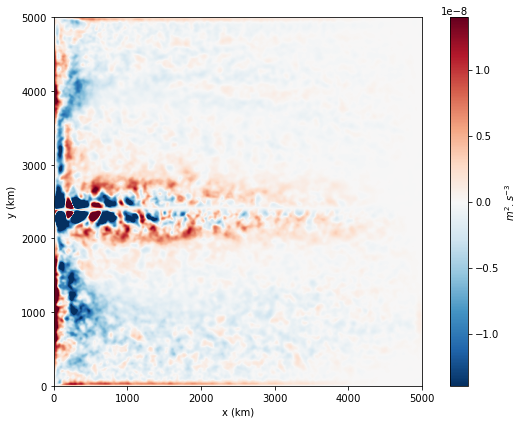

In [52]:
#mean PE to turbulent PE

#maxi = max(np.max(-pe_me2pe_p_me),np.abs(np.min(pe_me2pe_p_me)))
maxi = 2.0922367934223423e-07


fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(pe_me2pe_p_me, origin = 'lower', extent = [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/15, vmin = -maxi/15)
ax1.set_aspect('equal')
#ax1.set_title(r'$\overline{\overline{PE}}$ to $\overline{PE}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(pe_me2pe_p_me)
m.set_clim(-maxi/15, maxi/15)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')


#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/pe_me2pe_p_me.png')

In [21]:
print(maxi)

2.0922367934223423e-07


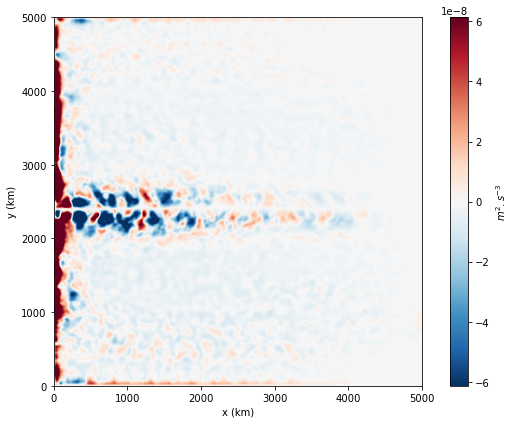

In [22]:
#w flot moyen
#maxi = max(np.max(w_b_me),np.abs(np.min(w_b_me)))
maxi = 9.812075520548501e-07

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(w_b_me, origin = 'lower', extent = [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/16, vmin = -maxi/16)
ax1.set_aspect('equal')
#ax1.set_title('w flot moyen')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(w_b_me)
m.set_clim(-maxi/16, maxi/16)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/w_flot_moyen.png')

In [23]:
print(maxi)

9.812075520548501e-07


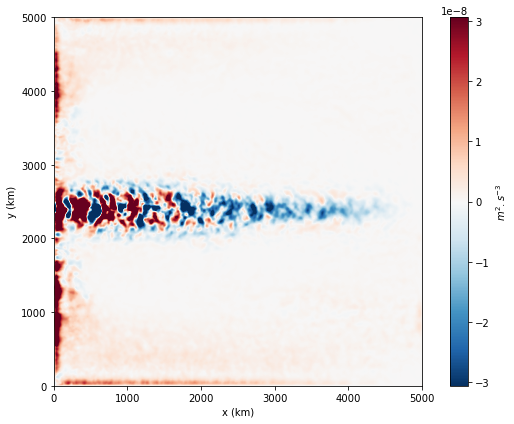

In [54]:
#w perturbation

#maxi = max(np.max(w_b_p_me),np.abs(np.min(w_b_p_me)))
maxi = 3.670525354931699e-07

fig, ax1 = plt.subplots(1, 1, figsize = (8, 6),tight_layout=True)


col = ax1.imshow(w_b_p_me, origin = 'lower', extent = [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/12, vmin = -maxi/12)
ax1.set_aspect('equal')
#ax1.set_title('w.b perturbations')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(w_b_p_me)
m.set_clim(-maxi/12, maxi/12)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-3}$')



#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/w_perturbation.png')

In [25]:
print(maxi)

3.670525354931699e-07


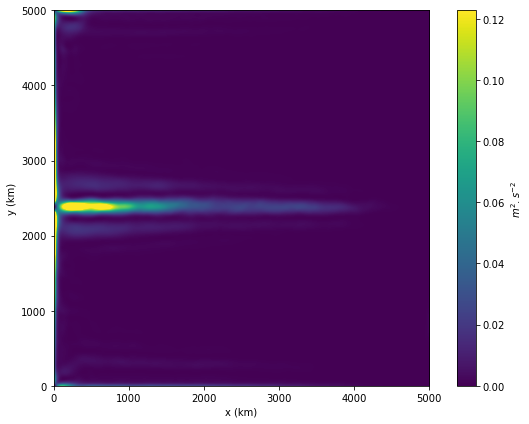

In [26]:
#KE flot moyen

#maxi = np.max(ke_me_i)
maxi= 0.24547950720658734

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(ke_me_i, origin = 'lower', extent = [0,5000,0,5000], vmax = maxi/4)
ax1.set_aspect('equal')
#ax1.set_title(r'$\overline{\overline{KE}}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable()
m.set_array(ke_me_i)
m.set_clim(0, maxi/2)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-2}$')


#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/KE_flot_moyen.png')

In [27]:
print(maxi)

0.24547950720658734


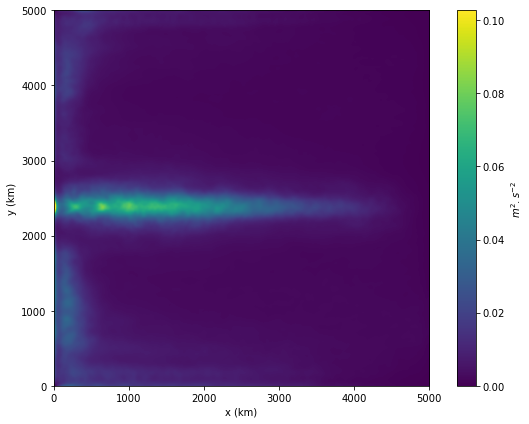

In [55]:
#KE perturbation

#maxi = np.max(ke_p_me)
maxi=0.20538788677124553

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(ke_p_me, origin = 'lower', extent = [0,5000,0,5000], vmax = maxi/2)
ax1.set_aspect('equal')
#ax1.set_title(r'$\overline{KEp}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable()
m.set_array(ke_p_me)
m.set_clim(0, maxi/2)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-2}$')


#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/KE_perturbation.png')

In [29]:
print(maxi)

0.20538788677124553


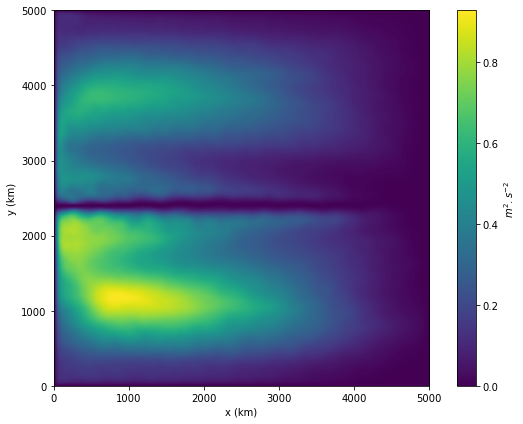

In [58]:
#PE flot moyen

#maxi = np.max(pe_me_i)
maxi = 1.3914803030454033

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(pe_me_i, origin = 'lower', extent = [0,5000,0,5000], vmin = 0, vmax = maxi/1.5)
ax1.set_aspect('equal')
#ax1.set_title(r'$\overline{\overline{KE}}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable()
m.set_array(ke_p_me)
m.set_clim(0, maxi/1.5)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-2}$')


#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/PE_flot_moyen.png')

In [31]:
print(maxi)

1.3914803030454033


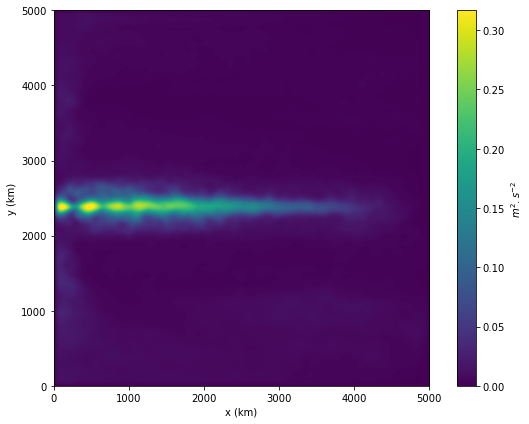

In [32]:
#PE perturbation

#maxi = np.max(pe_p_me)
maxi = 0.47503783543010547

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(pe_p_me, origin = 'lower', extent = [0,5000,0,5000], vmax = maxi/1.5)
ax1.set_aspect('equal')
#ax1.set_title(r'$\overline{PEp}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable()
m.set_array(pe_p_me)
m.set_clim(0, maxi/1.5)
plt.colorbar(m, ax= ax1).set_label(r'$m^2.s^{-2}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/PE_perturbation.png')

In [33]:
print(maxi)

0.47503783543010547


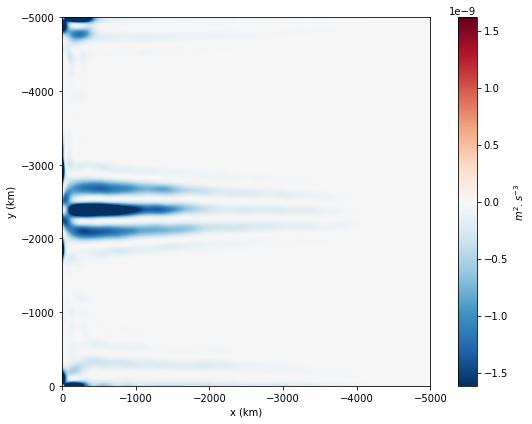

In [34]:
#bf flot moyen

#phys
bf_u_me = -((delta_ek*f0)/(2*dh[2]))*(u_me[-1]**2 + v_me[-1]**2)

#maxi = max(np.max(bf_u_me),np.abs(np.min(bf_u_me)))
maxi = 1.2926567860982633e-08

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)



col = ax1.imshow(bf_u_me,origin = 'lower', extent = [0,-5000,0,-5000], cmap = 'RdBu_r', vmax = maxi/8, vmin = -maxi/8)
ax1.set_aspect('equal')
#ax1.set_title(r'Bottom friction in $\overline{\overline{KE}}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap = 'RdBu_r')
m.set_array(bf_u_me)
m.set_clim(-maxi/8, maxi/8)
plt.colorbar(m, ax=ax1).set_label(r'$m^2.s^{-3}$')


#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/bottom_flot_moyen.png')

In [35]:
print(maxi)


1.2926567860982633e-08


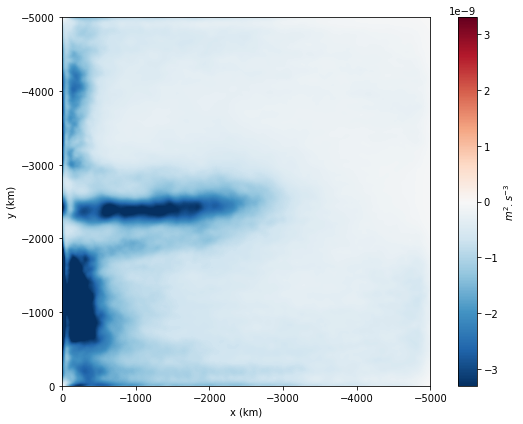

In [36]:
#bottom friction perturbation

bott_p_me = -bf*e_bottom_p_me

#maxi = max(np.max(bott_p_me),np.abs(np.min(bott_p_me)))
maxi = 6.610738189513497e-09

fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)


col = ax1.imshow(bott_p_me,origin = 'lower', extent = [0,-5000,0,-5000], cmap = 'RdBu_r', vmax = maxi/2, vmin = -maxi/2)
ax1.set_aspect('equal')
#ax1.set_title(r'Bottom friction in $\overline{KEp}$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap = 'RdBu_r')
m.set_array(bott_p_me)
m.set_clim(-maxi/2, maxi/2)
plt.colorbar(m, ax=ax1).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_rel/bottom_perturbation.png')

In [37]:
print(maxi)

6.610738189513497e-09
